# Assignment07

## Name: YangMyungCheol (양명철)
## ID: 20122776
## Submission Time: 2019.05.16. 11:45

[Apply K-means algorithm to both image value and its spatial domain]

For a given input image (either gray or color), apply a K-means algorithm that is designed to take into consideration of both the image intensity and its spatial domain with varying parameters: the number of clusters and the trade-off between the intensity energy and the spatial energy.

The objective function is given by:

$\sum_k \sum_\{ x \in I(k) \} [ \| f(x) -m_k \|^2 + a * \| x - c_k \|^2 ]$

where I(k) denotes the index set of x that belongs to cluster k, $m_k$ denotes the centroid of image intensity for cluster k, $c_k$ denotes the centroid of spatial location for cluster k, and a determines the importance between the image intensity and the spatial relation.

- Visualize the clustering results with varying k and a using the centroid color $m_k$ for each cluster k. 

- Visualize the energy curve for both the intensity energy and the spatial energy.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure
import sys
import math
import random

In [2]:
file_pix = 'student.jpg'
basic_pix = io.imread(file_pix) 
E = [] 
# storing energy list for iteration

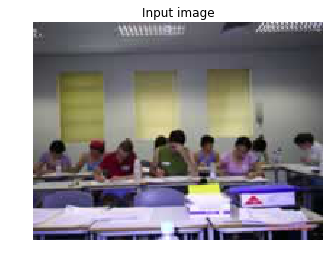

In [3]:
# 1. Input color image
plt.title('Input image')
plt.imshow(basic_pix)
plt.axis('off')
plt.show()

In [4]:
#Calculate row and column of pixel
pix_column = len(basic_pix)
pix_row = len(basic_pix[0])

In [5]:
list_R = []
list_G = []
list_B = []
for i in range(pix_column):
    for j in range(pix_row):
        list_R.append(basic_pix[i][j][0])
        list_G.append(basic_pix[i][j][1])
        list_B.append(basic_pix[i][j][2])
        

In [6]:
# find mean and standard deviation of each color
list_R
list_G
list_B

stdR= np.std(list_R)
stdG= np.std(list_G)
stdB= np.std(list_B)

meanR = np.mean(list_R)
meanG = np.mean(list_G)
meanB = np.mean(list_B)


stdRGB = [stdR, stdG, stdB]
meanRGB = [meanR, meanG, meanB]

In [7]:
# normalize the values of the input data to be [0, 1]
def normalize(data):

    data_normalized = (data - meanRGB ) / ( stdRGB )

    return(data_normalized)


In [8]:
# make normalized pix
normal_basic = []
for i in range(pix_column):
    temp = []
    for j in range(pix_row):
        temp.append(normalize (basic_pix[i][j]))
    normal_basic.append(temp)

In [9]:
# make RGB,X,Y - 5-dimension
NormalDimFive = []

for i in range(pix_column):
    for j in range(pix_row):
        NormalDimFive.append([normal_basic[i][j],i,j])


In [10]:
#Choose K & alpha
K = 5
alpha =0.0001
pix_list = []
pixel_num = len(NormalDimFive)

# Randomly assign the label
for i in range(pixel_num):
    ran_num = random.randint(0,K-1)
    pix_list.append(ran_num)



In [11]:
# divide clustering
list_of_grouplist = []
for i in range(K):
    list_c = []
    for j in range(len(pix_list)):
        if i == pix_list[j]:
            list_c.append(j)
    list_of_grouplist.append(list_c)

In [12]:
c_mean_pixel = []
for i in range(K):
    c_pixel = [0,0,0,0,0]
    for j in range(len(list_of_grouplist[i])):
        num = list_of_grouplist[i][j]
        c_RGB = NormalDimFive[num]

In [13]:
# initial centroid value
c_mean_pixel = []
for i in range(K):
    c_pixel = [0,0,0,0,0]
    for j in range(len(list_of_grouplist[i])):
        num = list_of_grouplist[i][j]
        c_RGB = NormalDimFive[num]
        c_pixel[0] += c_RGB[0][0]
        c_pixel[1] += c_RGB[0][1]
        c_pixel[2] += c_RGB[0][2]
        c_pixel[3] += c_RGB[1]
        c_pixel[4] += c_RGB[2]
        
    c_pixel[0] /= len(list_of_grouplist[i])
    c_pixel[1] /= len(list_of_grouplist[i])
    c_pixel[2] /= len(list_of_grouplist[i])
    c_pixel[3] /= len(list_of_grouplist[i])
    c_pixel[4] /= len(list_of_grouplist[i])
    
    c_mean_pixel.append(c_pixel)

In [14]:
# function of calculation computerEngery
def computeEnergy(): 
    energy = 0
    for i in range(pixel_num):
        for j in range(K):
            if i in list_of_grouplist[j]:
                a = np.array(c_mean_pixel[j][0:3])
                b = np.array(NormalDimFive[i][0])
                c = np.array(c_mean_pixel[j][3:5])
                d = np.array(NormalDimFive[i][1:3])
                energy_l2_norm = math.sqrt(sum((a-b)**2)  + sum(alpha * (c-d)**2))
                energy += energy_l2_norm
    return energy/pixel_num


In [15]:
# calculate distance
def dist_pixel(mean_pixel,input_pixel):
    a = np.array(mean_pixel[0:3])
    b = np.array(input_pixel[0][0:3])
    c = np.array(mean_pixel[3:5])
    d = np.array(input_pixel[1:3])
    return sum((a-b)**2)+ sum(alpha * (c-d)**2)


In [16]:
# 
list_check = list_of_grouplist
iter_num = 0
# Energy list
E.append(computeEnergy())
while True:
        
    dist_of_mean = []
    for i in range(pixel_num):
        vec = NormalDimFive[i]
        dist_of_pixel = []
        append = dist_of_pixel.append
        for j in c_mean_pixel:
            d = dist_pixel(j,vec)
            append(d)
        dist_of_mean.append(dist_of_pixel)

    list_of_grouplist = []
    for i in range(K):
        list = []
        list_of_grouplist.append(list)
    
    for i in range(pixel_num):
        label = dist_of_mean[i].index(min(dist_of_mean[i]))  #label는 label값이 저장된다.
        list_of_grouplist[label].append(i)
    
    #Record Energy result
    E.append(computeEnergy())
    iter_num += 1
    
    prev_centroid = c_mean_pixel
    c_mean_pixel = []
    for i in range(K):
        c_pixel = [0,0,0,0,0]
        for j in range(len(list_of_grouplist[i])):
            num = list_of_grouplist[i][j]
            c_RGB = NormalDimFive[num]
            c_pixel[0] += c_RGB[0][0]
            c_pixel[1] += c_RGB[0][1]
            c_pixel[2] += c_RGB[0][2]
            c_pixel[3] += c_RGB[1]
            c_pixel[4] += c_RGB[2]

            
        c_pixel[0] /= len(list_of_grouplist[i])
        c_pixel[1] /= len(list_of_grouplist[i])
        c_pixel[2] /= len(list_of_grouplist[i])
        c_pixel[3] /= len(list_of_grouplist[i])
        c_pixel[4] /= len(list_of_grouplist[i])
        
        
        
        c_mean_pixel.append(c_pixel)
        
    if prev_centroid == c_mean_pixel:
        break

In [17]:
# denormalize the values 
def denormalize(data):
    
    de_c_mean_pixel = []
    for i in range(K):
        temp2 = []
        for j in range(3):
            temp2.append(data[i][j] * stdRGB[j] + meanRGB[j])
        de_c_mean_pixel.append(temp2)

    return(de_c_mean_pixel)


In [18]:
# denormalize the centroids
denorm_cmean = denormalize(c_mean_pixel)

In [19]:
# change RGB
for i in range(K):
    for j in range(len(list_of_grouplist[i])):
        num = list_of_grouplist[i][j]
        NormalDimFive[num] = denorm_cmean[i]

In [20]:
# two dimen sion
last_pix =[]
for i in range(pix_column):
    last_pix_row = []
    append = last_pix_row.append
    for j in range(pix_row):
        num = i*pix_row + j
        pix_RGB_int = []
        pix_RGB_int.append(int(NormalDimFive[num][0]))
        pix_RGB_int.append(int(NormalDimFive[num][1]))
        pix_RGB_int.append(int(NormalDimFive[num][2]))
        append(pix_RGB_int)
    last_pix.append(last_pix_row)

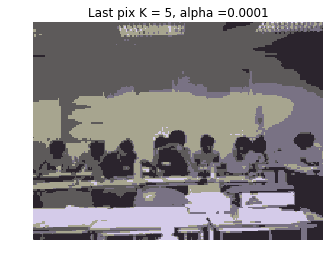

In [21]:
# Print output last_pix
plt.figure(2)
plt.title('Last pix K = 5, alpha =0.0001')
plt.imshow(last_pix)
plt.axis('off')
plt.show()

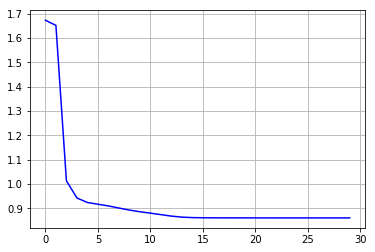

In [22]:
#Energy curve for each $K$
plt.figure(3)
x_range = np.arange(len(E))
plt.plot(x_range,E,"b")
plt.grid(True)
plt.show()

In [23]:
file_pix = 'student.jpg'
basic_pix = io.imread(file_pix) 
E = [] 
# storing energy list for iteration

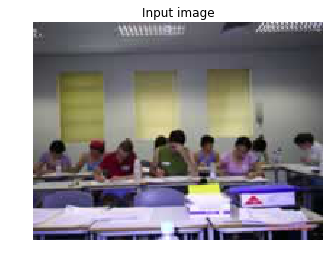

In [24]:
# 1. Input color image
plt.title('Input image')
plt.imshow(basic_pix)
plt.axis('off')
plt.show()

In [25]:
list_R = []
list_G = []
list_B = []
for i in range(pix_column):
    for j in range(pix_row):
        list_R.append(basic_pix[i][j][0])
        list_G.append(basic_pix[i][j][1])
        list_B.append(basic_pix[i][j][2])
        

In [26]:
# find mean and standard deviation of each color
list_R
list_G
list_B

stdR= np.std(list_R)
stdG= np.std(list_G)
stdB= np.std(list_B)

meanR = np.mean(list_R)
meanG = np.mean(list_G)
meanB = np.mean(list_B)


stdRGB = [stdR, stdG, stdB]
meanRGB = [meanR, meanG, meanB]

In [27]:
# make normalized pix
normal_basic = []
for i in range(pix_column):
    temp = []
    for j in range(pix_row):
        temp.append(normalize (basic_pix[i][j]))
    normal_basic.append(temp)

In [28]:
# make RGB,X,Y - 5-dimension
NormalDimFive = []

for i in range(pix_column):
    for j in range(pix_row):
        NormalDimFive.append([normal_basic[i][j],i,j])


In [29]:
#Choose K & alpha
K = 5
alpha =0.05
pix_list = []
pixel_num = len(NormalDimFive)

# Randomly assign the label
for i in range(pixel_num):
    ran_num = random.randint(0,K-1)
    pix_list.append(ran_num)



In [30]:
# divide clustering
list_of_grouplist = []
for i in range(K):
    list_c = []
    for j in range(len(pix_list)):
        if i == pix_list[j]:
            list_c.append(j)
    list_of_grouplist.append(list_c)

In [31]:
c_mean_pixel = []
for i in range(K):
    c_pixel = [0,0,0,0,0]
    for j in range(len(list_of_grouplist[i])):
        num = list_of_grouplist[i][j]
        c_RGB = NormalDimFive[num]

In [32]:
# initial centroid value
c_mean_pixel = []
for i in range(K):
    c_pixel = [0,0,0,0,0]
    for j in range(len(list_of_grouplist[i])):
        num = list_of_grouplist[i][j]
        c_RGB = NormalDimFive[num]
        c_pixel[0] += c_RGB[0][0]
        c_pixel[1] += c_RGB[0][1]
        c_pixel[2] += c_RGB[0][2]
        c_pixel[3] += c_RGB[1]
        c_pixel[4] += c_RGB[2]
        
    c_pixel[0] /= len(list_of_grouplist[i])
    c_pixel[1] /= len(list_of_grouplist[i])
    c_pixel[2] /= len(list_of_grouplist[i])
    c_pixel[3] /= len(list_of_grouplist[i])
    c_pixel[4] /= len(list_of_grouplist[i])
    
    c_mean_pixel.append(c_pixel)

In [33]:
# 
list_check = list_of_grouplist
iter_num = 0
# Energy list
E.append(computeEnergy())
while True:
        
    dist_of_mean = []
    for i in range(pixel_num):
        vec = NormalDimFive[i]
        dist_of_pixel = []
        append = dist_of_pixel.append
        for j in c_mean_pixel:
            d = dist_pixel(j,vec)
            append(d)
        dist_of_mean.append(dist_of_pixel)

    list_of_grouplist = []
    for i in range(K):
        list = []
        list_of_grouplist.append(list)
    
    for i in range(pixel_num):
        label = dist_of_mean[i].index(min(dist_of_mean[i]))  #label는 label값이 저장된다.
        list_of_grouplist[label].append(i)
    
    #Record Energy result
    E.append(computeEnergy())
    iter_num += 1
    
    prev_centroid = c_mean_pixel
    c_mean_pixel = []
    for i in range(K):
        c_pixel = [0,0,0,0,0]
        for j in range(len(list_of_grouplist[i])):
            num = list_of_grouplist[i][j]
            c_RGB = NormalDimFive[num]
            c_pixel[0] += c_RGB[0][0]
            c_pixel[1] += c_RGB[0][1]
            c_pixel[2] += c_RGB[0][2]
            c_pixel[3] += c_RGB[1]
            c_pixel[4] += c_RGB[2]

            
        c_pixel[0] /= len(list_of_grouplist[i])
        c_pixel[1] /= len(list_of_grouplist[i])
        c_pixel[2] /= len(list_of_grouplist[i])
        c_pixel[3] /= len(list_of_grouplist[i])
        c_pixel[4] /= len(list_of_grouplist[i])
        
        
        
        c_mean_pixel.append(c_pixel)
        
    if prev_centroid == c_mean_pixel:
        break

In [34]:
# denormalize the centroids
denorm_cmean = denormalize(c_mean_pixel)

In [35]:
# change RGB
for i in range(K):
    for j in range(len(list_of_grouplist[i])):
        num = list_of_grouplist[i][j]
        NormalDimFive[num] = denorm_cmean[i]

In [36]:
# two dimen sion
last_pix =[]
for i in range(pix_column):
    last_pix_row = []
    append = last_pix_row.append
    for j in range(pix_row):
        num = i*pix_row + j
        pix_RGB_int = []
        pix_RGB_int.append(int(NormalDimFive[num][0]))
        pix_RGB_int.append(int(NormalDimFive[num][1]))
        pix_RGB_int.append(int(NormalDimFive[num][2]))
        append(pix_RGB_int)
    last_pix.append(last_pix_row)

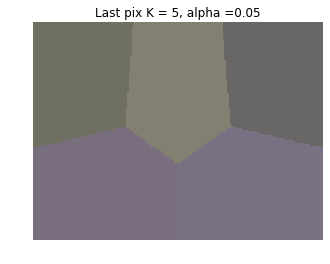

In [37]:
# Print output last_pix
plt.figure(2)
plt.title('Last pix K = 5, alpha =0.05')
plt.imshow(last_pix)
plt.axis('off')
plt.show()

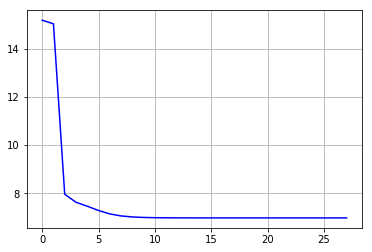

In [38]:
#Energy curve for each $K$
plt.figure(3)
x_range = np.arange(len(E))
plt.plot(x_range,E,"b")
plt.grid(True)
plt.show()